### <font color='red'>Predicting Breast Cancer</font>

This project classifies cancer cells into two classes benign or malignant

#### <font color='blue'>Data Understanding</font>

In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

In [2]:
# importing data set
missing_values = ["?"]
features = ['ID number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                     'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                     'Normal Nucleoli', 'Mitoses', 'Class']
df =  pd.read_csv('breast-cancer-wisconsin_data.csv', names = features, delimiter = ',', na_values = missing_values)

In [3]:
# checking data
df.head(8)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2


In [4]:
# rows, columns
df.shape

(699, 11)

In [5]:
# 16 null values
pd.isnull(df).sum()

ID number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [6]:
# unique values of each descriptive feature
df.apply(lambda col: col.unique())

ID number                      [1000025, 1002945, 1015425, 1016277, 1017023, ...
Clump Thickness                                  [5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity of Cell Size                          [1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity of Cell Shape                         [1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal Adhesion                                [1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single Epithelial Cell Size                      [2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare Nuclei                    [1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, nan, 5.0,...
Bland Chromatin                                  [3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal Nucleoli                                  [1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses                                             [1, 5, 4, 2, 3, 7, 10, 8, 6]
Class                                                                     [2, 4]
dtype: object

In [7]:
# data types and number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID number                    699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [8]:
# removing duplicates
df.drop_duplicates(inplace = True)

In [9]:
# shape after removing duplicates
df.shape

(691, 11)

#### <font color='blue'>Data Understanding</font>

In [10]:
# Data Quality Report for Categorical Variables
cat_header = ['Count', '% Miss', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']

cat_df = pd.DataFrame(index=features, columns=cat_header)
cat_df.index.name = 'Feature_Name'
columns = df[features]

count = columns.count()
cat_df[cat_header[0]] = columns.count()

missing = columns.isna()
cat_df[cat_header[1]] = round((missing.sum() / len(columns)) * 100, 1)

cat_df[cat_header[2]] = columns.nunique()

amount = len(features)
mode_f = [''] * amount
modes = [''] * amount
modes_2 = [''] * amount
mode_p = [''] * amount
mode_f2 = [''] * amount
mode_p2 = [''] * amount
    
for col in columns:
    values = columns[col].value_counts()
    index = features.index(col)
    
    mode = values.index[0]
    modes[index] = mode

    mode_count = values.loc[mode]
    mode_f[index] = mode_count
    
    mode_per = (mode_count/(count[index])) * 100
    mode_p[index] = round(mode_per, 1)
    
    mode_2 = values.index[1]
    modes_2[index] = mode_2
    
    mode_count2 = values.loc[mode_2]
    mode_f2[index] = mode_count2
    
    mode_per2 = (mode_count2/(count[index]))*100
    mode_p2[index] = round(mode_per2, 1)
    
cat_df[cat_header[3]] = modes
cat_df[cat_header[4]] = mode_f
cat_df[cat_header[5]] = mode_p
cat_df[cat_header[6]] = modes_2
cat_df[cat_header[7]] = mode_f2
cat_df[cat_header[8]] = mode_p2

cat_df

,Count,% Miss,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature_Name,,,,,,,,,
ID number,691,0.0,645,1182404.0,6,0.9,1276091.0,5,0.7
Clump Thickness,691,0.0,10,1.0,142,20.5,5.0,129,18.7
Uniformity of Cell Size,691,0.0,10,1.0,379,54.8,10.0,65,9.4
Uniformity of Cell Shape,691,0.0,10,1.0,348,50.4,2.0,59,8.5
Marginal Adhesion,691,0.0,10,1.0,401,58.0,3.0,58,8.4
Single Epithelial Cell Size,691,0.0,10,2.0,383,55.4,3.0,71,10.3
Bare Nuclei,675,2.3,10,1.0,397,58.8,10.0,130,19.3
Bland Chromatin,691,0.0,10,2.0,165,23.9,3.0,161,23.3
Normal Nucleoli,691,0.0,10,1.0,437,63.2,10.0,61,8.8


Handling Missing Values

In [11]:
# showing the first row of of data containing missing data
df.iloc[23]

ID number                      1057013.0
Clump Thickness                      8.0
Uniformity of Cell Size              4.0
Uniformity of Cell Shape             5.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          NaN
Bland Chromatin                      7.0
Normal Nucleoli                      3.0
Mitoses                              1.0
Class                                4.0
Name: 23, dtype: float64

In [12]:
# filling missing values with mode value (1)
df1 = df.fillna(1)

In [13]:
# ensuring missing value is filled with 0
df1.iloc[23]

ID number                      1057013.0
Clump Thickness                      8.0
Uniformity of Cell Size              4.0
Uniformity of Cell Shape             5.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Bland Chromatin                      7.0
Normal Nucleoli                      3.0
Mitoses                              1.0
Class                                4.0
Name: 23, dtype: float64

In [14]:
# # casting 'Bare Nuclei'into integer since it's a categorical feature
# df1['Bare Nuclei'] = df1['Bare Nuclei'].astype(int)

In [15]:
df1.head(10)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


#### <font color='blue'>Data Visualization</font>

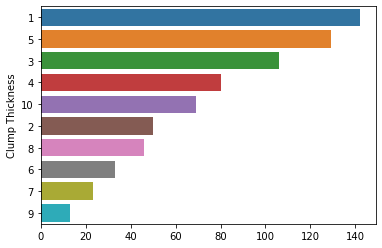

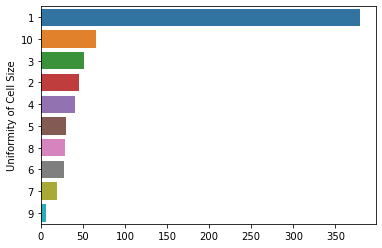

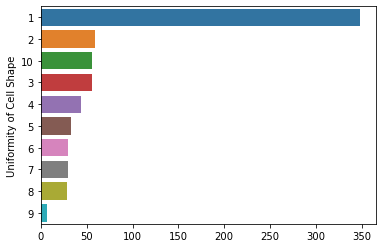

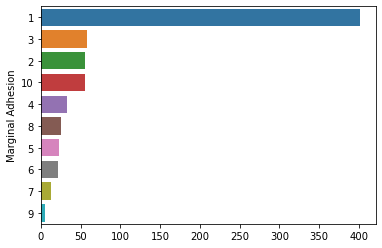

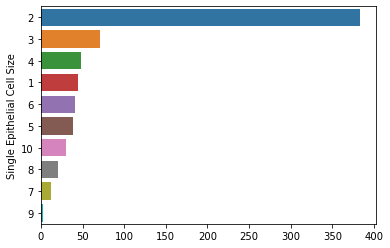

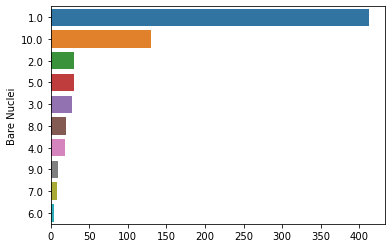

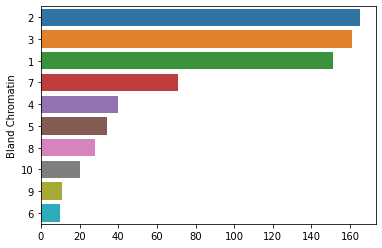

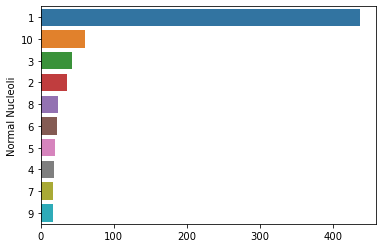

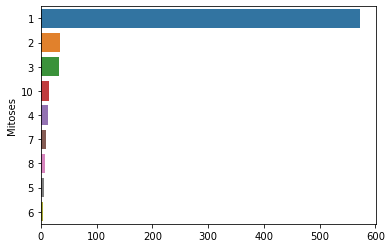

In [16]:
# box plot of categorical values
categorical_ft = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                     'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                     'Normal Nucleoli', 'Mitoses']

for i in categorical_ft:
    f = df1[i].value_counts()
    sns.barplot(x = f.values, y = f.index, orient='h', order= f.index)
    plt.ylabel(i)
    plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

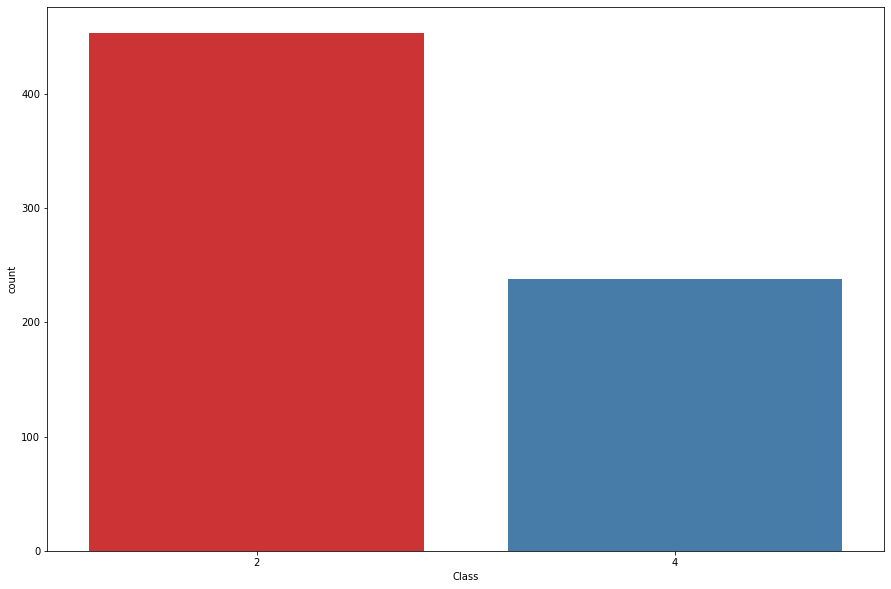

In [17]:
# Visualazing Class using a countplot 
# Higher number of benign tumors in the data 
plt.figure(figsize=(15,10))
sns.countplot(x="Class", data=df1 , palette="Set1")

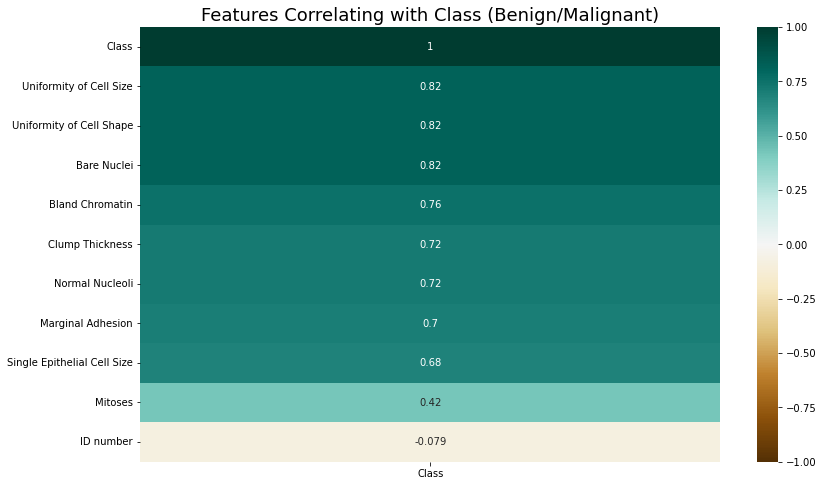

In [18]:
# plotting correlation heatmap
plt.figure(figsize=(13,8))
heatmap = sns.heatmap(df1.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class (Benign/Malignant)', fontdict={'fontsize':18});

In [19]:
# cast datatypes into float
df2 = df1.copy()
df_numerical = df2.astype('float')

In [20]:
# show datatypes
df_numerical.dtypes

ID number                      float64
Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
Class                          float64
dtype: object

In [21]:
# check data 
df_numerical.head(10)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,1018099.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
7,1018561.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
8,1033078.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0
9,1033078.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


#### <font color='blue'> Splitting Data to Training and Validation</font>

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(df_numerical, df_numerical["Class"], 
                                                                test_size=0.25, train_size = 0.75, random_state=0)

In [23]:
# splitting the data to descriptive features and target feature 
x = df_numerical.iloc[:,0:10]  # descriptive features
Y = df_numerical.iloc[:,-1]    # target feature (class)

##### <font color='blue'> Feature Importance</font>

In [24]:
from sklearn.feature_selection import mutual_info_classif

# calculate dependency between each training descriptive feature and target
mutual_info = mutual_info_classif(x_train, y_train)

# change to series and set index as column names
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

Class                          0.649245
Uniformity of Cell Size        0.496623
Uniformity of Cell Shape       0.466368
Bare Nuclei                    0.417462
Bland Chromatin                0.415105
Single Epithelial Cell Size    0.341350
Normal Nucleoli                0.340098
Marginal Adhesion              0.333525
Clump Thickness                0.321003
Mitoses                        0.146511
ID number                      0.021326
dtype: float64

<AxesSubplot:>

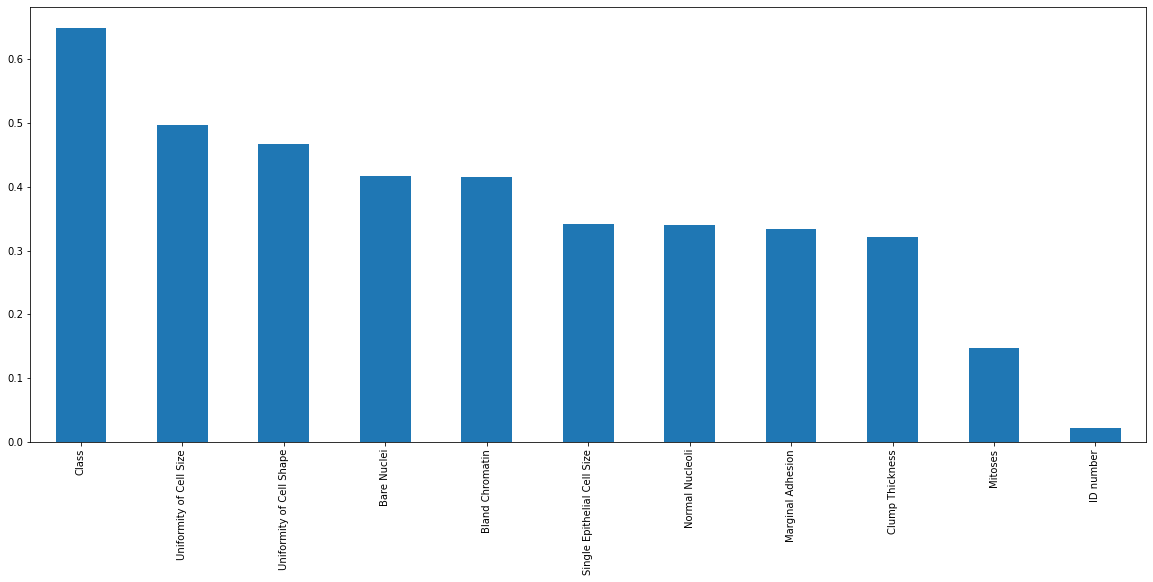

In [25]:
# visualize dependencies
mutual_info.plot.bar(figsize=(20,8))

In [26]:
# calculate dependency between each training descriptive feature and target
mutual_info = mutual_info_classif(x_valid, y_valid)

# change to series and set index as column names
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_valid.columns
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

Class                          0.632527
Uniformity of Cell Shape       0.434210
Bare Nuclei                    0.419161
Uniformity of Cell Size        0.356451
Normal Nucleoli                0.333612
Single Epithelial Cell Size    0.321730
Bland Chromatin                0.316291
Clump Thickness                0.269132
Marginal Adhesion              0.208933
Mitoses                        0.065825
ID number                      0.040019
dtype: float64

<AxesSubplot:>

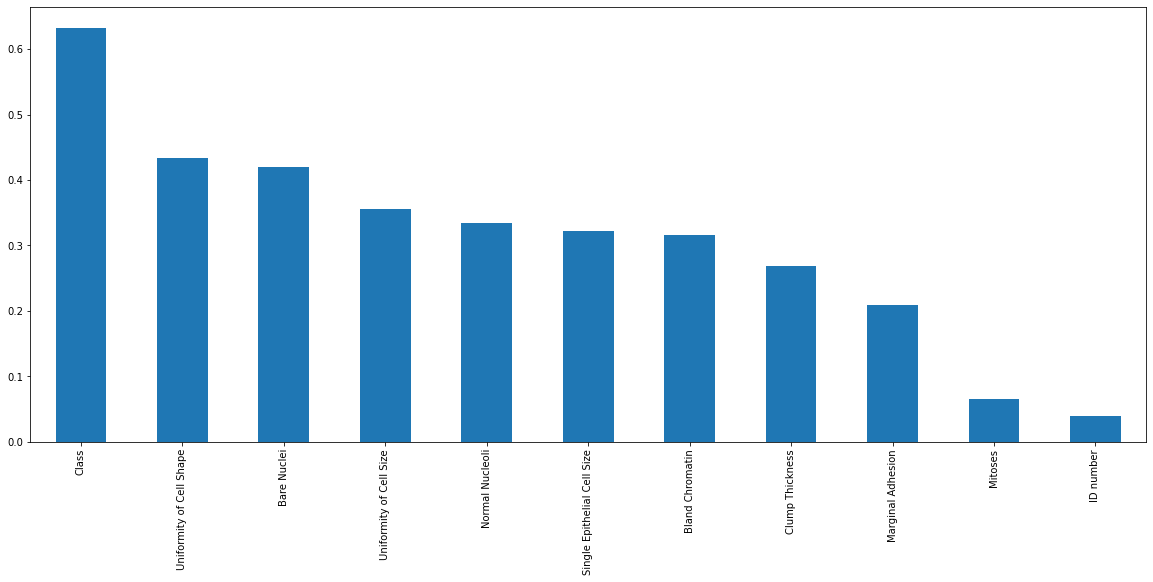

In [27]:
# visualize dependencies
mutual_info.plot.bar(figsize=(20,8))

[0.00104195 0.02068121 0.1103966  0.09977265 0.05921044 0.01890349
 0.12514921 0.04071388 0.06109559 0.00434757 0.4586874 ]


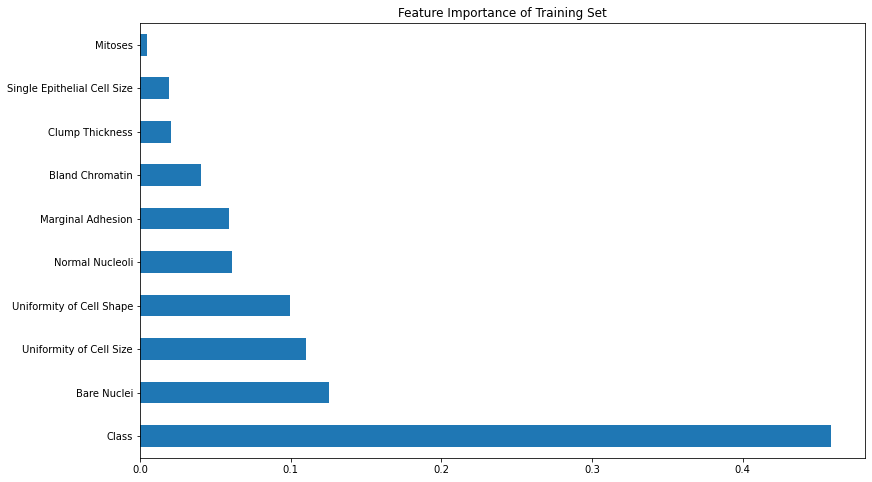

In [28]:
# feature selection according to importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_) #use built-in class feature_importances of tree based classifiers


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)

plt.figure(figsize=(13,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance of Training Set')
plt.show()

[0.00409679 0.04389049 0.05831836 0.10879305 0.02181017 0.04355972
 0.13017726 0.04000091 0.07729416 0.00436936 0.46768971]


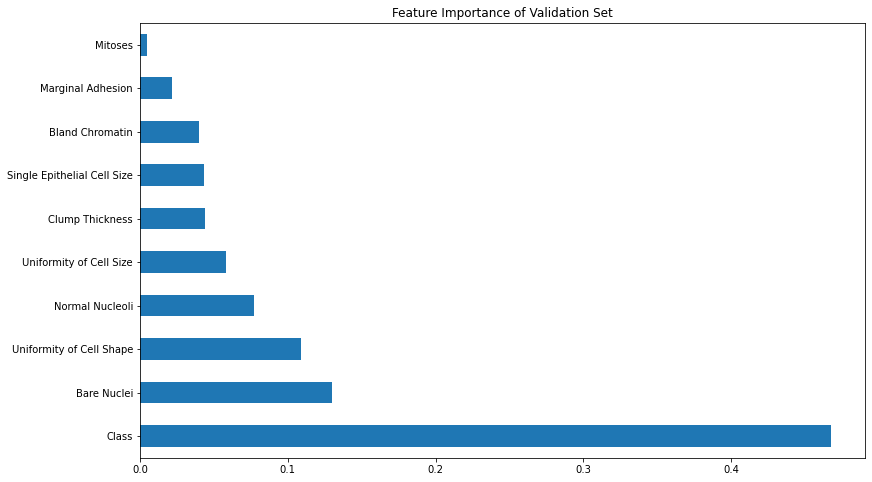

In [29]:
# feature selection according to importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_valid,y_valid)
print(model.feature_importances_) #use built-in class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_valid.columns)

plt.figure(figsize=(13,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance of Validation Set')
plt.show()

#### <font color='blue'> Data Preprocessiong - for SVM </font>

In [30]:
# Selected features Bare Nuclei, Normal Nucleoli, Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin
# dropping the 'ID number', 'Mitoses', 'Marginal Adhesion' columns 'Single Epithelial Cell Size', 'Mitoses'
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [31]:
# normalizing data using MinMaxScaler
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(X) #a_scaled is an N-d numpy array now. We need to create a new dataframe off of it
df_scaled = pd.DataFrame(data=a_scaled, columns=X.columns)
df_scaled.head()

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.000000,0.000000,0.000000,0.222222,0.000000
1,0.333333,0.333333,1.000000,0.222222,0.111111
2,0.000000,0.000000,0.111111,0.222222,0.000000
3,0.777778,0.777778,0.333333,0.222222,0.666667
4,0.000000,0.000000,0.000000,0.222222,0.000000


#### <font color='blue'> Splitting Data - KCross Validation</font>

In [32]:
# kfold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(df_scaled, Y)

#### <font color='blue'> Applying Support Vector Machines (SVM) </font>

In [33]:
# importing Support Vector Machine (SVM) Classifier
from sklearn import svm

# create support vector machines model
svc = svm.SVC()

In [34]:
# evaluate the scores of each fold
scores = []

for k, (train, test) in enumerate(kfold):
    svc.fit(df_scaled.iloc[train, :], Y.iloc[train])
    score = svc.score(df_scaled.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nSVM Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9424
Fold:  2, Accuracy: 0.9493
Fold:  3, Accuracy: 0.9565
Fold:  4, Accuracy: 0.9638
Fold:  5, Accuracy: 0.9783


SVM Cross-Validation accuracy: mean: 0.9581, std: 0.0124 


#### <font color='blue'> Splitting Data for GridSearch </font>

In [35]:
# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

#### <font color='blue'> Grid Search - Parameter Tuning </font>

In [68]:
from sklearn.model_selection import GridSearchCV

# defining parameter for SVM   
parameters = {'C': [1,2,3,4,5,6,7,8,9,100]} 

# using SVM, apply grid search
model = svm.SVC()   
grid = GridSearchCV(model, parameters)    
grid.fit(X_train, Y_train)

# predict values for test set
Y_pred = grid.predict(X_test)

# counter for correct classification 
correct = 0

# remove index so we can iterate through Y_test
y_test_noIndex = Y_test.reset_index(drop = True)

for i in range(np.size(Y_pred)):
    #if correctly predicted
    if y_test_noIndex[i] == Y_pred[i] :            
        #increase correct count
        correct += 1  

# calculate accuracy             
accuracy = (correct/np.size(Y_pred)) * 100

print("Tuned Support Vector Machines Parameters: {}".format(grid.best_params_))
print("Maximum accuracy achieved by sklearn model through grid searching: ", np.round(accuracy, 2))

Tuned Support Vector Machines Parameters: {'C': 1}
Maximum accuracy achieved by sklearn model through grid searching:  96.51


#### <font color='blue'> Data Preprocessiong - for KNN </font>

In [37]:
df_numerical.head(2)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0


In [38]:
# splitting the data to descriptive features and target feature 
x = df_numerical.iloc[:,0:10]  # descriptive features
Y = df_numerical.iloc[:,-1]    # target feature (class)

In [39]:
# Selected features Bare Nuclei, Normal Nucleoli, Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin
# dropping the 'ID number', 'Mitoses', 'Marginal Adhesion' columns 'Single Epithelial Cell Size', 'Mitoses'
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [40]:
# normalizing data using MinMaxScaler
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(X) #a_scaled is an N-d numpy array now. We need to create a new dataframe off of it
df_scaled = pd.DataFrame(data=a_scaled, columns=X.columns)
df_scaled.head()

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.000000,0.000000,0.000000,0.222222,0.000000
1,0.333333,0.333333,1.000000,0.222222,0.111111
2,0.000000,0.000000,0.111111,0.222222,0.000000
3,0.777778,0.777778,0.333333,0.222222,0.666667
4,0.000000,0.000000,0.000000,0.222222,0.000000


#### <font color='blue'> Applying K- Nearest Neighbor (KNN) </font>

In [41]:
# importing K-nearest neighbors classification model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)

In [42]:
# kfold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(df_scaled, Y)

In [43]:
# evaluate the scores of each fold
scores = []

for k, (train, test) in enumerate(kfold):
    KNN.fit(df_scaled.iloc[train, :], Y.iloc[train])
    score = KNN.score(df_scaled.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nKNN Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9281
Fold:  2, Accuracy: 0.9493
Fold:  3, Accuracy: 0.9638
Fold:  4, Accuracy: 0.9565
Fold:  5, Accuracy: 0.9710


KNN Cross-Validation accuracy: mean: 0.9537, std: 0.0147 


#### <font color='blue'> Grid Search - Parameter Tuning </font>

In [44]:
# defining parameters for knn   
parameters = {'n_neighbors': [10,15,25,45,50,75,90,92,93,95,100], 'p': [1,2,3,4]}

# using a knn classifier, apply grid search
model = KNeighborsClassifier()        
grid = GridSearchCV(model, parameters)    
grid.fit(X_train, Y_train)

# predict values for test set
Y_pred = grid.predict(X_test)

# counter for correct classification 
correct = 0

# remove index so we can iterate through Y_test
y_test_noIndex = Y_test.reset_index(drop = True)

for i in range(np.size(Y_pred)):
    #if correctly predicted
    if y_test_noIndex[i] == Y_pred[i] :            
        #increase correct count
        correct += 1  

# calculate accuracy             
accuracy = (correct/np.size(Y_pred)) * 100

print("Tuned KNeighbors Classifier Parameters: {}".format(grid.best_params_))
print("Maximum accuracy achieved by sklearn model through grid searching:", np.round(accuracy, 2))

Tuned KNeighbors Classifier Parameters: {'n_neighbors': 15, 'p': 3}
Maximum accuracy achieved by sklearn model through grid searching: 93.01


#### <font color='blue'> Data Preprocessiong - for Decision Tree </font>

In [45]:
df_numerical.head(2)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0


In [46]:
# splitting the data to descriptive features and target feature 
x = df_numerical.iloc[:,0:10]  # descriptive features
Y = df_numerical.iloc[:,-1]    # target feature (class)

In [47]:
# Selected features Bare Nuclei, Normal Nucleoli, Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin
# dropping the 'ID number', 'Mitoses', 'Marginal Adhesion' columns 'Single Epithelial Cell Size', 'Mitoses'
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [48]:
# kfold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(X, Y)

#### <font color='blue'> Applying Decision Tree Classifier </font>

In [49]:
# importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(criterion='gini', splitter='random')

In [50]:
# evaluate the scores of each fold
scores = []

for k, (train, test) in enumerate(kfold):
    DT_clf.fit(X.iloc[train, :], Y.iloc[train])
    score = DT_clf.score(X.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nDT Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9065
Fold:  2, Accuracy: 0.9348
Fold:  3, Accuracy: 0.9493
Fold:  4, Accuracy: 0.9565
Fold:  5, Accuracy: 0.9420


DT Cross-Validation accuracy: mean: 0.9378, std: 0.0173 


#### <font color='blue'> Grid Search - Parameter Tuning </font>

In [51]:
# defining parameters for decision tree classifier 
parameters = {"max_depth": [3, 4, 5, 6], "max_features": [1, 2, 3, 4], "min_samples_leaf": [ 1, 2, 3, 4], 
              "criterion": ["gini", "entropy"], "random_state": [40, 50, 60, 70, 80]}

# using a decision tree classifier, apply grid search
model = DecisionTreeClassifier()        
grid = GridSearchCV(model, parameters)    
grid.fit(X_train, Y_train)

# predict values for test set
Y_pred = grid.predict(X_test)

# counter for correct classification 
correct = 0

# remove index so we can iterate through Y_test
y_test_noIndex = Y_test.reset_index(drop = True)

for i in range(np.size(Y_pred)):
    #if correctly predicted
    if y_test_noIndex[i] == Y_pred[i] :            
        #increase correct count
        correct += 1  

# calculate accuracy             
accuracy = (correct/np.size(Y_pred)) * 100

print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))
print("Maximum accuracy achieved by sklearn model through grid searching:", np.round(accuracy, 2))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 2, 'random_state': 50}
Maximum accuracy achieved by sklearn model through grid searching: 93.45


#### <font color='blue'> Data Preprocessiong - for Random Forest Classifier </font>

In [52]:
df_numerical.head(2)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0


In [53]:
# splitting the data to descriptive features and target feature 
x = df_numerical.iloc[:,0:10]  # descriptive features
Y = df_numerical.iloc[:,-1]    # target feature (class)

In [54]:
# Selected features Bare Nuclei, Normal Nucleoli, Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin
# dropping the 'ID number', 'Mitoses', 'Marginal Adhesion' columns 'Single Epithelial Cell Size', 'Mitoses'
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [55]:
# kfold cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)
kfold = kf.split(X, Y)

In [56]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [57]:
# evaluate the scores of each fold
scores = []

for k, (train, test) in enumerate(kfold):
    RF_clf.fit(X.iloc[train, :], Y.iloc[train])
    score = RF_clf.score(X.iloc[test, :], Y.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.4f' % (k+1, score))
print('\n\nRF Cross-Validation accuracy: mean: %.4f, std: %.4f ' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.9568
Fold:  2, Accuracy: 0.9565
Fold:  3, Accuracy: 0.9638
Fold:  4, Accuracy: 0.9855
Fold:  5, Accuracy: 0.9638


RF Cross-Validation accuracy: mean: 0.9653, std: 0.0106 


#### <font color='blue'> Applying Neural Networks </font>

In [58]:
import tensorflow as tf 
from tensorflow import keras

In [59]:
# splitting the data to descriptive features and target feature 
x = df_numerical.iloc[:,0:10]  # descriptive features
Y = df_numerical.iloc[:,-1]    # target feature (class)

In [60]:
# Selected features Bare Nuclei, Normal Nucleoli, Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin
# dropping the 'ID number', 'Mitoses', 'Marginal Adhesion' columns 'Single Epithelial Cell Size', 'Mitoses'
X = x.drop(['ID number', 'Clump Thickness','Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses'], axis=1)
X.head(3)

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,1.0,1.0,1.0,3.0,1.0
1,4.0,4.0,10.0,3.0,2.0
2,1.0,1.0,2.0,3.0,1.0


In [61]:
Y = Y.replace(2.0, 0).replace(4.0,1)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size=0.33, random_state=88)

In [63]:
X_train.columns

Index(['Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli'],
      dtype='object')

In [64]:
# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_shape=(5,),activation="relu"))
model.add(Dense(1, input_shape=(2,),activation="sigmoid"))

# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.BinaryAccuracy()]) 

# Print a summary of the Keras model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [65]:
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
47/47 [==============================] - 1s 2ms/step - loss: 0.8331 - binary_accuracy: 0.5823
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6230 - binary_accuracy: 0.8312
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5725 - binary_accuracy: 0.8463
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5393 - binary_accuracy: 0.8528
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5102 - binary_accuracy: 0.8766
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4840 - binary_accuracy: 0.8788
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4612 - binary_accuracy: 0.9026
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4411 - binary_accuracy: 0.9113
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4230 - binary_accuracy: 0.9199
Epoch 10/50
47/47 [==============================] - 0s

In [66]:
# acc= model.accuracy_score(y_train[0], y_pred[0])
accuracy = model.evaluate(X_test, Y_test)
accuracy

8/8 [==============================] - 0s 2ms/step - loss: 0.1870 - binary_accuracy: 0.9389


[0.18704986572265625, 0.9388646483421326]

In [67]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test,  Y_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 3ms/step - loss: 0.1870 - binary_accuracy: 0.9389
Accuracy: 93.89
